# CLUSTERING - CUSTOMER SEGMENTATION

## 1. Business Understanding

In this step, we get challenges and issues faced by a business. These may prevent a business from executing strategy and achieving goals. In some cases, business problems also threaten the long term survival of a firm.

### Context

In marketing, market (customer) segmentation is the process of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers based on some type of shared characteristics. Filter and analyze groups of customers to detect risk, engage proactively and avoid churn.

### Problem Statement

Based on the given context, the problem is how to be making a cluster of our customer's segment based on the dataset. This customer segmentation can be build based on some type of shared characteristics so we can see the potentially market for our company.

### Goals

The goals of this project is we can clustered the customer segmentation based on the sample (dataset) that we have. So we will make a Machine Learning - Unsupervised Learning - Clustering to clusterd the data.

### Evaluation Metrics

On this project, we will use `Silhouette`to measure of how similar an object is to its own cluster.

---

## 2. Data Understanding

In this step, we will understanding the data such as; read the dataset, giving the descripton of variable (attributes of the data) due to seek the better understand data assets and manage accordingly.

In [1]:
# Import library for exploring dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To ignores the warnings
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [2]:
# Read the dataset
df = pd.read_csv('segmentation data.csv', encoding= 'unicode_escape')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
# Check train dataset info

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, len(df),df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

df_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
df_info

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,ID,int64,2000,0,0.0,2000,"[100000411, 100000892]"
1,Sex,int64,2000,0,0.0,2,"[0, 1]"
2,Marital status,int64,2000,0,0.0,2,"[0, 1]"
3,Age,int64,2000,0,0.0,58,"[46, 67]"
4,Education,int64,2000,0,0.0,4,"[0, 3]"
5,Income,int64,2000,0,0.0,1982,"[122359, 109992]"
6,Occupation,int64,2000,0,0.0,3,"[2, 0]"
7,Settlement size,int64,2000,0,0.0,3,"[2, 0]"


As we can see that our dataset has 8 columns and 2000 rows on it. There is no Missing Value and no Duplicated Data (due the Number Unique of ID has the same value of Data Count).

---

## 3. Data Cleaning

In this step, we will process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicated, or incompleted data within a dataset. Having clean data will ultimately increase overall productivity and allow for the highest quality information in your decision-making.

As mentioned before, our dataset is cleaned from no missing value and Duplicated Data based on the info table.

### Delete unnecassarry column

On this step, we will delete unnecassary column that we think it's not truely effect to our dataset and this could be from our based knowledge. As far as we known, `ID` variable has no effect to other variable in this dataset. So we will drop ID.

In [4]:
# Drop unnecassarry column
df = df.drop(['ID'], axis=1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


---

## 4. Exploratory Data Analysis

Exploratory data analysis is applied to investigate the data and summarize the key insights. It will give us the basic understanding of our data, it's distribution, null values and much more. So we do the Exploratory Data Analysis (EDA) to our data for better understanding.  

In this project, we will see customer's behaviour and customer's segmented on our dataset.

In [5]:
# Def high_val and low_val
num_val = df[(['Age','Income'])]
cat_val = df[(['Sex','Marital status','Education','Occupation','Settlement size'])]

**NUM_VAL ANALYSIS**

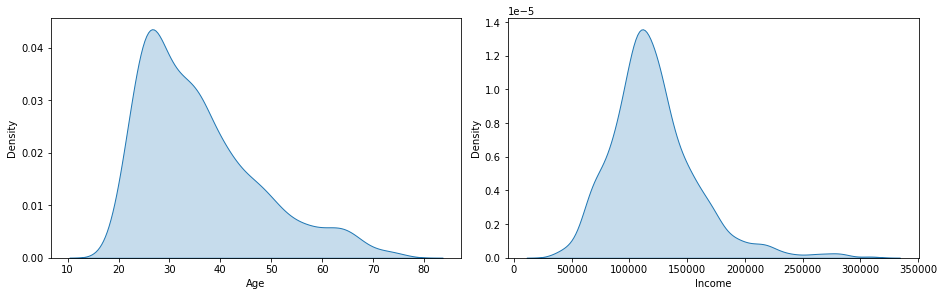

In [6]:
# Graph each variable df_mean with target
fig = plt.figure(figsize=(13, 4), constrained_layout=True)
for i in range(len(num_val.columns)):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(data=num_val, x=num_val[num_val.columns[i]], shade=True)

**Key Points :**
- As we can see that mainly, the `Age` of our customer in a range of 20 - 50 y.o
- Many of Customer had `Income` around 50000 - 200000

**CAT_VAL ANALYSIS**

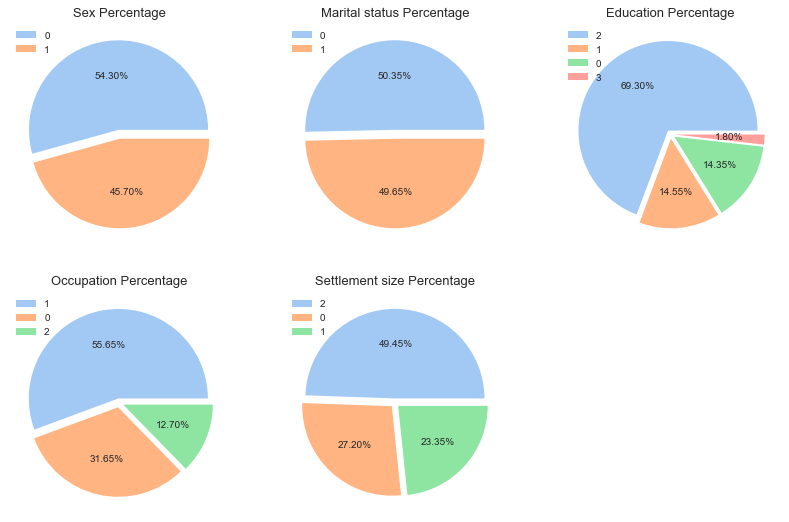

In [7]:
# Rank Product by Customer Favorite
plt.style.use('seaborn')
plt.figure(figsize=(14,14))
colors = sns.color_palette('pastel')

plt.subplot(331)
plt.pie(cat_val['Sex'].value_counts().values, explode= (0.05,0.05), colors = colors,
        autopct='%.2f%%')
plt.title("Sex Percentage", size = 13)
plt.legend(cat_val['Sex'].unique(), loc='upper left')

plt.subplot(332)
plt.pie(cat_val['Marital status'].value_counts().values, explode= (0.05,0.05), colors = colors,
        autopct='%.2f%%')
plt.title("Marital status Percentage", size = 13)
plt.legend(cat_val['Marital status'].unique(), loc='upper left')

plt.subplot(333)
plt.pie(cat_val['Education'].value_counts().values, explode= (0.05,0.05,0.05,0.05), colors = colors,
        autopct='%.2f%%')
plt.title("Education Percentage", size = 13)
plt.legend(cat_val['Education'].unique(), loc='upper left')

plt.subplot(334)
plt.pie(cat_val['Occupation'].value_counts().values, explode= (0.05,0.05,0.05), colors = colors,
        autopct='%.2f%%')
plt.title("Occupation Percentage", size = 13)
plt.legend(cat_val['Occupation'].unique(), loc='upper left')

plt.subplot(335)
plt.pie(cat_val['Settlement size'].value_counts().values, explode= (0.05,0.05,0.05), colors = colors,
        autopct='%.2f%%')
plt.title("Settlement size Percentage", size = 13)
plt.legend(cat_val['Settlement size'].unique(), loc='upper left')

plt.show()

**Key Points:**
- Based on `Sex` feature, Customer with gender 0 is more than 1
- A difference of Customer's `Marital status` is just 0.35% of all (0 has more 7 peoples than 1)
- Many of customer had the 2 grade in `Education` percentage compiled by 1 and 0
- Many of Customer had a type-1 on `Occupation` percentage followed-by type-0 and type-2
- Customer more likely have 2 on `Sattlement size` than other

**Bivariat Analysis**

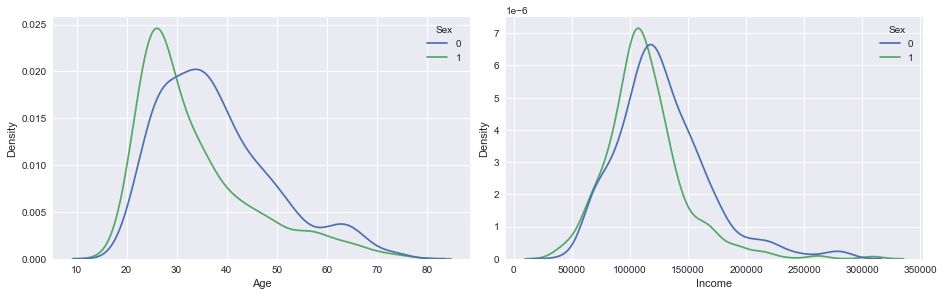

In [8]:
# Graph each variable df_mean with target
fig = plt.figure(figsize=(13, 4), constrained_layout=True)
for i in range(len(num_val.columns)):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(data=num_val, x=num_val[num_val.columns[i]], hue=cat_val['Sex'])

**Key Points:**
- Based on the `Age`, Customer with `Sex` 1 has a peak on range 20 - 30 y.o while Customer with `Sex` 0 has a peak on range mid-20 - 40 y.o
- Based on `Income`, Many customer with `Sex` 1 and 0 had Income around 50000 - 150000, where Customer with `Sex` 1 had a more peak Income than Sex 0 

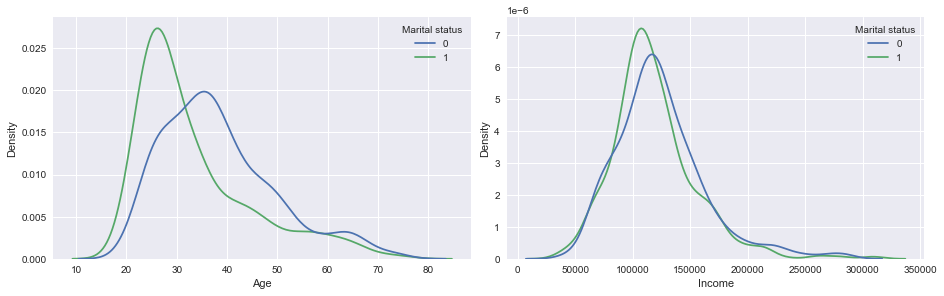

In [9]:
# Graph each variable df_mean with target
fig = plt.figure(figsize=(13, 4), constrained_layout=True)
for i in range(len(num_val.columns)):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(data=num_val, x=num_val[num_val.columns[i]], hue=cat_val['Marital status'])

**Key Points :**
The graph that displayed has the same as like bivariat with `Sex` feature before
- Based ont the `Age`, Customer with `Marital status` 1 has a peak on range 20 - 30 y.o while Customer with Marital status 0 has a peak on range mid-20 - 40 y.o
- Based on `Income`, Many customer with `Marital status` 1 and 0 had Income around 50000 - 150000, where Customer with Marital status 1 had a more peak Income than 0

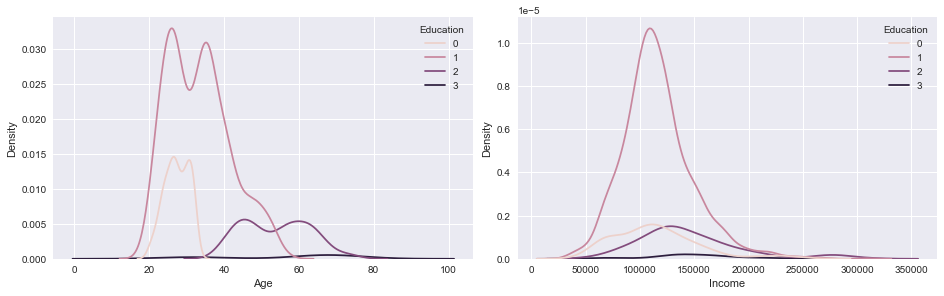

In [10]:
# Graph each variable df_mean with target
fig = plt.figure(figsize=(13, 4), constrained_layout=True)
for i in range(len(num_val.columns)):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(data=num_val, x=num_val[num_val.columns[i]], hue=cat_val['Education'])

**Key Points :**
- Based on `Age`, we can see that most of customer had level-1 on `Education` in range between 20 - 40 y.o followed by level-0 in range 20 - < 40 y.o and level-2 (40 - 65 y.o)
- Based on `Income`, Many customer in all-level `Education` had Income between 50000 - 200000

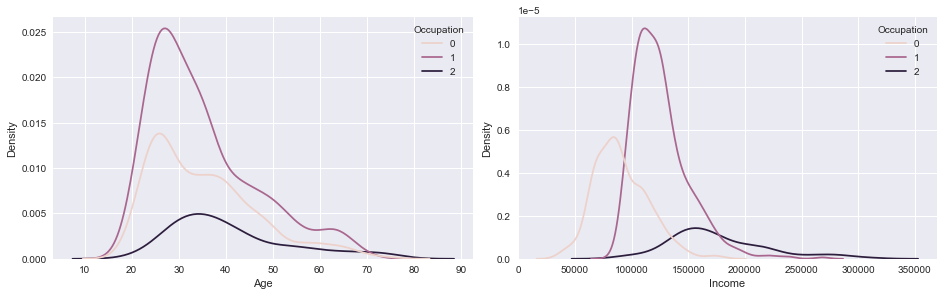

In [11]:
# Graph each variable df_mean with target
fig = plt.figure(figsize=(13, 4), constrained_layout=True)
for i in range(len(num_val.columns)):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(data=num_val, x=num_val[num_val.columns[i]], hue=cat_val['Occupation'])

**Key Points :**
- Based on `Age`, we can see that the most of customer had type-1 `Occupation` is peak on range between 20 - 50 y.o followed by type-0 and type-2 in the same peak range with level-0 (20 - 50 y.o)
- Based on `Income`, Many of customer type-0 `Occupation` had income between 50000 - 150000, while many of the other type had income between 100000 - 200000

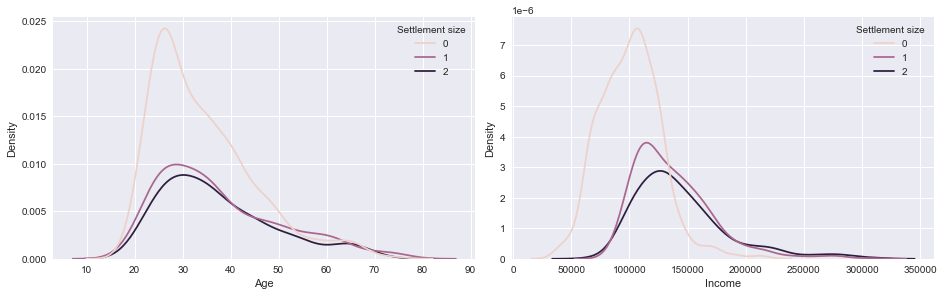

In [12]:
# Graph each variable df_mean with target
fig = plt.figure(figsize=(13, 4), constrained_layout=True)
for i in range(len(num_val.columns)):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(data=num_val, x=num_val[num_val.columns[i]], hue=cat_val['Settlement size'])

**Key Points :**
- Based on Age, we can see that the most of customer had level-0 on `Settlement size` in peak range between 20 - 50 y.o followed by level-1 and level-2 in the same peak range with level-0 (20 - 50 y.o)
- Based on Income, Many of customer level-0 on `Settlement size` had income between 50000 - 150000, while many of the other level had income between 75000 - 200000

**Data Correlation**

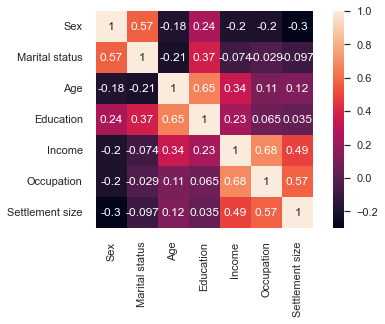

In [13]:
# Data Correlation with heatmap
sns.set(rc={'figure.figsize':(7,4)})
corr = df.corr()
sns.heatmap(corr,annot=True, square=True)
plt.show()

As we can see that our dataset had a strong correlation between features `Sex` with `Marital Status`, `Age` with `Education` and `Occupation` with `Income`.

---

## 5. Preview Outliers

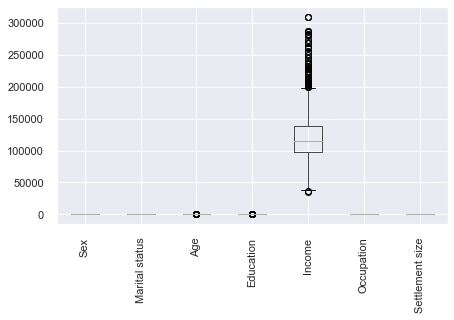

In [14]:
# Check the outliers for numerical variabel
plt.figure(figsize=(7, 4))
df.boxplot(rot=90);

As we can see that all the features **except:Income* has no outliers on it. But the outliers on `Income` will be assumed as a good outliers because the datas are near each other.

---

## 6. Preprocessing

Previously, we can see that the `Age` and `Income` features has a left-skewed distribution of data. Since it assumes normality in our features, and because we will using standard scaler in our modeling, we will log-transform these two features first because we want to make sure that our modeling is prevent from bias. So we will have to correct that for the model to perform correctly first.

### Log Transform

In [15]:
# Log Transformation
df['Age'] = np.log(df.Age)
df['Income'] = np.log(df.Income)

In [16]:
# Preview Dataset
df.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,4.204693,2,11.733426,1,2
1,1,1,3.091042,1,11.923531,1,2
2,0,0,3.891820,1,11.398748,0,0
3,0,0,3.806662,1,12.052717,1,1
4,0,0,3.970292,1,11.911910,1,1


### Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df)

---

## 7. Modeling

In this step, we will create a model to predict our dataset. As mentioned before that the model will be build is clustering.

### K-Means clustering

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In [18]:
# Import module
from sklearn import cluster
from sklearn.cluster import KMeans

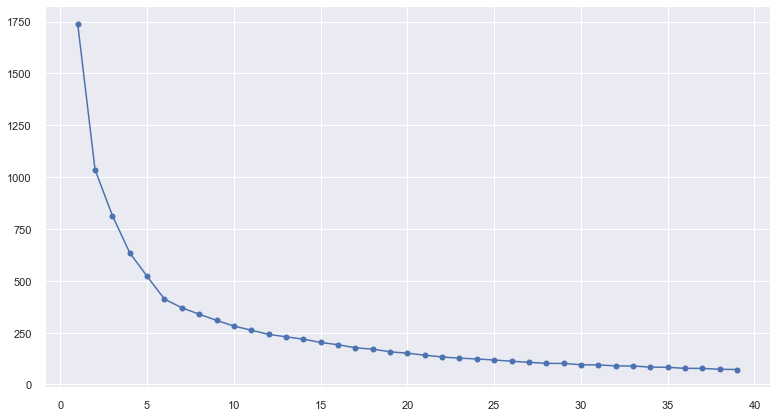

In [19]:
# Elbow method for searching the best cluster
inertia = []
num_cluster = range(1,40)
for num in num_cluster:
    km = KMeans(n_clusters = num, random_state=0)
    km = km.fit(X)
    inertia.append(km.inertia_)
plt.figure(figsize=(13,7))
plt.plot(num_cluster, inertia,marker='o')

As we can see that the elbow happens around `5-20` clusters. After that we will see the `Silhouette` val to see how good our model.

In [20]:
# Import module
from sklearn.metrics import silhouette_score

In [21]:
# Applying KMeans with 7 clusters
km = KMeans(n_clusters=7).fit(X)
Silhouette_Score = silhouette_score(X, km.labels_)

In [22]:
print('Silhouette Score: %.5f' % Silhouette_Score)

Silhouette Score: 0.43386


As we can see that we get Silhouette Score 0.43385 whic is quite good cause we still can different (grouping) the data by it's cluster.

### Creating 3D Visualization with PCA

In [23]:
# Import module
from sklearn.decomposition import PCA

# Define pca - X
pca = PCA(n_components=3, random_state=42)
X = pca.fit_transform(X)

In [24]:
# Make dataframe for visualization
X_df = pd.DataFrame(X, columns = ['col1','col2','col3'])

# Merge dataframe with KMeans 7 cluster
labels = km.labels_
X_df['labels'] = labels

In [25]:
# Show X_df head
X_df.head()

,col1,col2,col3,labels
0,0.829180,0.351029,-0.162564,1
1,-0.532059,0.719347,-0.230627,3
2,0.489762,-0.693245,0.175378,5
3,0.712261,-0.028386,-0.049268,1
4,0.718283,-0.036820,-0.052714,1


In [26]:
# Change 'labels' to string
X_df['labels'] = X_df['labels'].astype(str)

In [27]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [28]:
# Import module
import plotly.express as px

# Visualization the result
fig = px.scatter_3d(X_df, x='col1', y='col2', z='col3',
              color=X_df['labels'])
fig.show()

As we can see that the the clusters from our model are quite separated well because the algorithm seems to be doing the cluster separation well.